In [1]:
import numpy as np
import datetime
from astropy.time import Time
from astropy.table import vstack, Table, MaskedColumn
from astroquery.eso import Eso
from astral import Observer
from astral.sun import time_at_elevation, sunrise

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

ISO 8601 compliant date-time format “YYYY-MM-DDTHH:MM:SS.sss…”. This is the same as TimeISO except for a “T” instead of space between the date and time. For example, 2000-01-01T00:00:00.000 is midnight on January 1, 2000.

/var/folders/3y/cmsgt3_x7x72bbs__zhy_q6h0008wr/T/ipykernel_91123/864031656.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


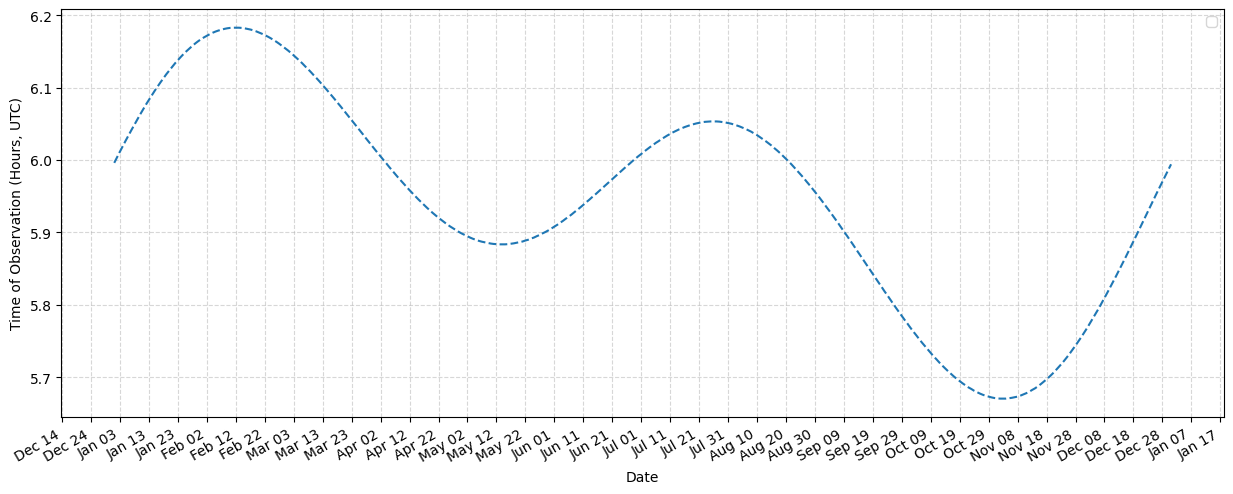

In [2]:
### PLOT ###
fig, ax = plt.subplots(figsize=(15, 6))

# Define Observatory Location (Replace with actual latitude & longitude)
# latitude = 48.1351
# longitude = 11.5820  
latitude = 0
longitude = 0

elevation = 0  
observer = Observer(latitude, longitude, elevation)

# Define time range for 2024
dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(366)]
# dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(250, 300)]

# Compute LST when Sun is -35 degrees below the horizon
lst_times = []
for date in dates:
    sun_time = sunrise(observer, date)
    lst_times.append(sun_time)

# Convert to MJD for TAP query
times = [Time(t).isot for t in lst_times]
times_mjd = Time(times).mjd

# Convert Sun at -35° times
sun_dates = [t.datetime.date() for t in Time(times_mjd, format='mjd')]
sun_times = [t.datetime for t in Time(times, format='isot')]
sun_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in sun_times]

# Scatter plot for Sun at -35° times
# ax.scatter(sun_dates, sun_hours, label="Sun at -35° Time", color='C1', marker='x')
ax.plot(sun_dates, sun_hours, color='C0', ls='--', alpha=1)

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as "Month Day"
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show ticks every 5 days
fig.autofmt_xdate()

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Time of Observation (Hours, UTC)")
ax.legend()
ax.grid(ls='--', alpha=0.5)

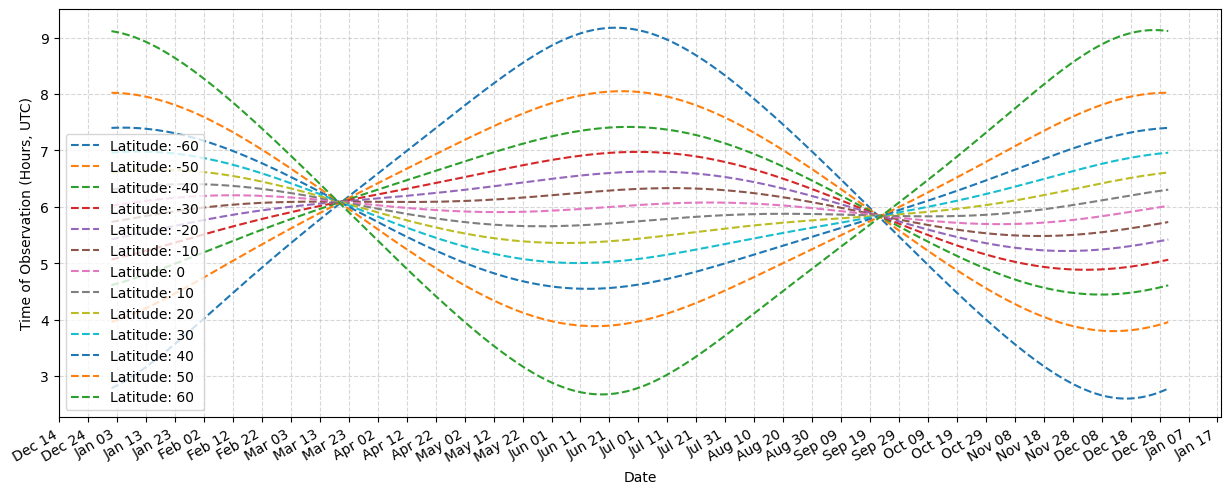

In [6]:
### PLOT ###
fig, ax = plt.subplots(figsize=(15, 6))

for i, latitude in enumerate(np.arange(-60,70,10)):

    # Define Observatory Location (Replace with actual latitude & longitude)
    longitude = 0
    elevation = 0  
    observer = Observer(latitude, longitude, elevation)

    # Define time range for 2024
    dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(366)]
    # dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(250, 300)]

    # Compute LST when Sun is -35 degrees below the horizon
    lst_times = []
    for date in dates:
        sun_time = time_at_elevation(observer, 0, date, direction='rising')
        lst_times.append(sun_time)

    # Convert to MJD for TAP query
    times = [Time(t).isot for t in lst_times]
    times_mjd = Time(times).mjd

    # Convert Sun at -35° times
    sun_dates = [t.datetime.date() for t in Time(times_mjd, format='mjd')]
    sun_times = [t.datetime for t in Time(times, format='isot')]
    sun_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in sun_times]

    # Scatter plot for Sun at -35° times
    # ax.scatter(sun_dates, sun_hours, label="Sun at -35° Time", color='C1', marker='x')
    ax.plot(sun_dates, sun_hours, color=f'C{i}', ls='--', alpha=1, label=f"Latitude: {latitude}")

    # Format x-axis as dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as "Month Day"
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show ticks every 5 days
    fig.autofmt_xdate()

    # Formatting
    ax.set_xlabel("Date")
    ax.set_ylabel("Time of Observation (Hours, UTC)")
    ax.legend()
    ax.grid(ls='--', alpha=0.5)

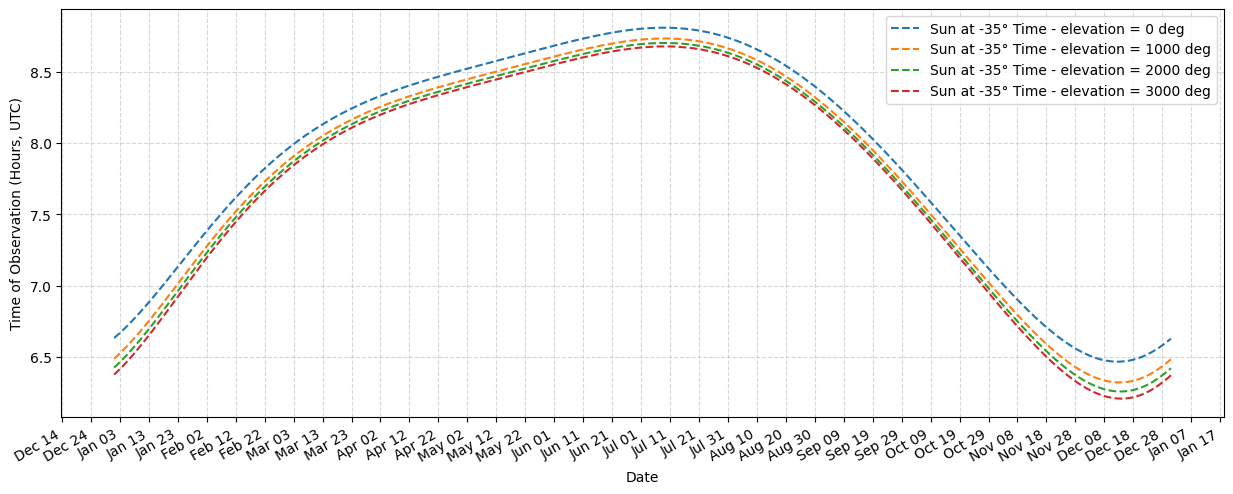

In [15]:
### PLOT ###
fig, ax = plt.subplots(figsize=(15, 6))

for i, elevation in enumerate([0, 1000, 2000, 3000]):

    # Define Observatory Location (Replace with actual latitude & longitude)
    latitude = -24.6275  # Example: Paranal Observatory, Chile - DOUBLE CHECK
    longitude = -70.4042
    observer = Observer(latitude, longitude, elevation)

    # Define time range for 2024
    dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(366)]
    # dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(250, 300)]

    # Compute LST when Sun is -35 degrees below the horizon
    lst_times = []
    for date in dates:
        sun_time = time_at_elevation(observer, -35, date, direction='rising')
        lst_times.append(sun_time)

    # Convert to MJD for TAP query
    times = [Time(t).isot for t in lst_times]
    times_mjd = Time(times).mjd

    # Convert Sun at -35° times
    sun_dates = [t.datetime.date() for t in Time(times_mjd, format='mjd')]
    sun_times = [t.datetime for t in Time(times, format='isot')]
    sun_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in sun_times]

    # Scatter plot for Sun at -35° times
    # ax.scatter(sun_dates, sun_hours, label="Sun at -35° Time", color='C1', marker='x')
    ax.plot(sun_dates, sun_hours, color=f'C{i}', ls='--', alpha=1, label=f"Sun at -35° Time - elevation = {elevation} deg")

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as "Month Day"
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show ticks every 5 days
fig.autofmt_xdate()

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Time of Observation (Hours, UTC)")
ax.legend()
ax.grid(ls='--', alpha=0.5)

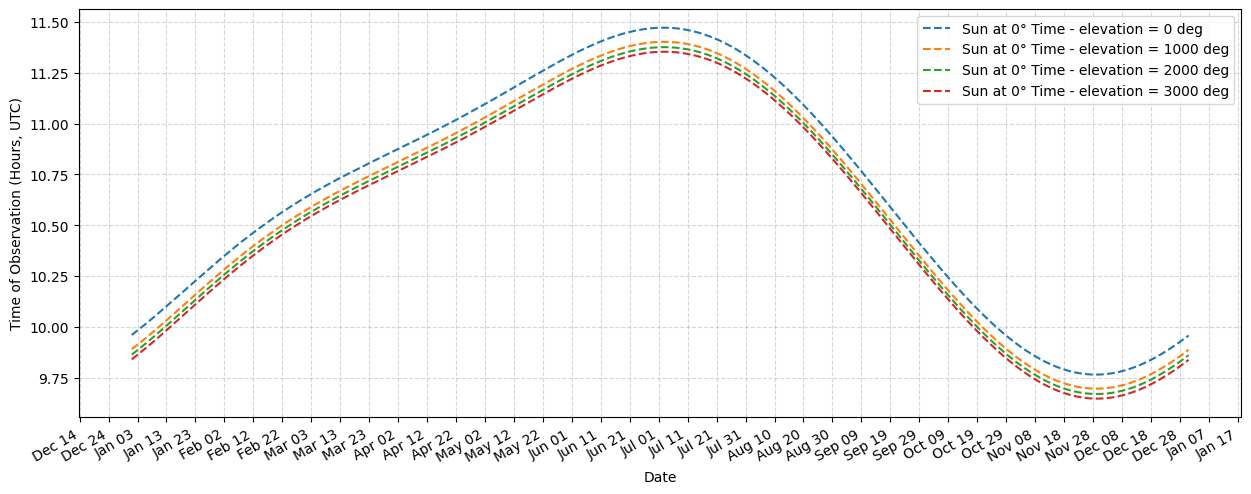

In [17]:
### PLOT ###
fig, ax = plt.subplots(figsize=(15, 6))

for i, elevation in enumerate([0, 1000, 2000, 3000]):

    # Define Observatory Location (Replace with actual latitude & longitude)
    latitude = -24.6275  # Example: Paranal Observatory, Chile - DOUBLE CHECK
    longitude = -70.4042
    observer = Observer(latitude, longitude, elevation)

    # Define time range for 2024
    dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(366)]
    # dates = [datetime.date(2024, 1, 1) + datetime.timedelta(days=i) for i in range(250, 300)]

    # Compute LST when Sun is -35 degrees below the horizon
    lst_times = []
    for date in dates:
        sun_time = time_at_elevation(observer, 0, date, direction='rising')
        lst_times.append(sun_time)

    # Convert to MJD for TAP query
    times = [Time(t).isot for t in lst_times]
    times_mjd = Time(times).mjd

    # Convert Sun at -35° times
    sun_dates = [t.datetime.date() for t in Time(times_mjd, format='mjd')]
    sun_times = [t.datetime for t in Time(times, format='isot')]
    sun_hours = [t.hour + t.minute / 60 + t.second / 3600 for t in sun_times]

    # Scatter plot for Sun at -35° times
    # ax.scatter(sun_dates, sun_hours, label="Sun at -35° Time", color='C1', marker='x')
    ax.plot(sun_dates, sun_hours, color=f'C{i}', ls='--', alpha=1, label=f"Sun at 0° Time - elevation = {elevation} deg")

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  # Format as "Month Day"
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Show ticks every 5 days
fig.autofmt_xdate()

# Formatting
ax.set_xlabel("Date")
ax.set_ylabel("Time of Observation (Hours, UTC)")
ax.legend()
ax.grid(ls='--', alpha=0.5)

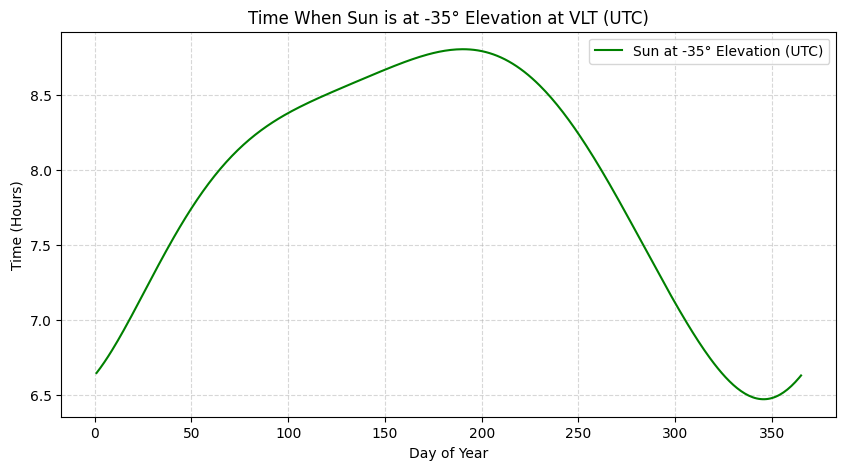

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define constants for the ELT location in Chile
latitude = -24.6275  # Example: Paranal Observatory, Chile - DOUBLE CHECK
longitude = -70.4042
timezone_offset = 0  # UCT
target_elevation = -35  # Target Sun elevation in degrees

year = 2025  # Year for calculations

days = np.arange(1, 366)  # Day of the year (1 to 365)

# Step 1: Compute the Solar Declination for each day
# Solar declination formula (approximate):
declination = 23.44 * np.sin(np.radians((360 / 365) * (days - 81)))

# Step 2: Compute the Hour Angle (H) when the Sun is at -35° elevation
# Using the formula: cos(H) = (sin(elevation) - sin(lat) * sin(dec)) / (cos(lat) * cos(dec))
H_neg35 = np.degrees(
    np.arccos(
        (np.sin(np.radians(target_elevation)) - np.sin(np.radians(latitude)) * np.sin(np.radians(declination))) /
        (np.cos(np.radians(latitude)) * np.cos(np.radians(declination)))
    )
)

# Step 3: Convert Hour Angle to Apparent Solar Time
# Apparent Solar Time = 12 - H/15 - (longitude / 15)
sun_at_neg35_utc = 12 - H_neg35 / 15 - (longitude / 15)

# Step 4: Compute the Equation of Time (EoT) correction
B = np.radians((360 / 365) * (days - 81))  # Intermediate variable
EoT = 9.87 * np.sin(2 * B) - 7.53 * np.cos(B) - 1.5 * np.sin(B)  # EoT in minutes
EoT_hours = EoT / 60  # Convert to hours

# Step 5: Convert Apparent Solar Time to Mean Solar Time
sun_at_neg35_mean_utc = sun_at_neg35_utc - EoT_hours

# Step 6: Convert to Timezone
sun_at_neg35_chile_time = sun_at_neg35_mean_utc + timezone_offset

# Create a DataFrame for easy visualization
df_neg35 = pd.DataFrame({"Day of Year": days, "Sun at -35° Elevation (UTC)": sun_at_neg35_chile_time})

# Step 7: Plot the results
plt.figure(figsize=(10, 5))
plt.plot(days, sun_at_neg35_chile_time, label="Sun at -35° Elevation (UTC)", color='g')
plt.xlabel("Day of Year")
plt.ylabel("Time (Hours)")
plt.title("Time When Sun is at -35° Elevation at VLT (UTC)")
plt.legend()
plt.grid(ls='--', alpha=0.5)
plt.show()